In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

![](S1.png)

![](S2.png)

![](S3.png)

![](S4.png)

In [36]:
class LinearRegression:
    
    def __init__(self, lr = 0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self_weights = None
        self.bias = None
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))     
            # Here, we have not added Summation becoz a/c to Numpy dot includes summation
            db = (1/n_samples) * np.sum(y_pred-y)


            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
        
        
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

![](S55.png)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [38]:
X, y = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=4)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

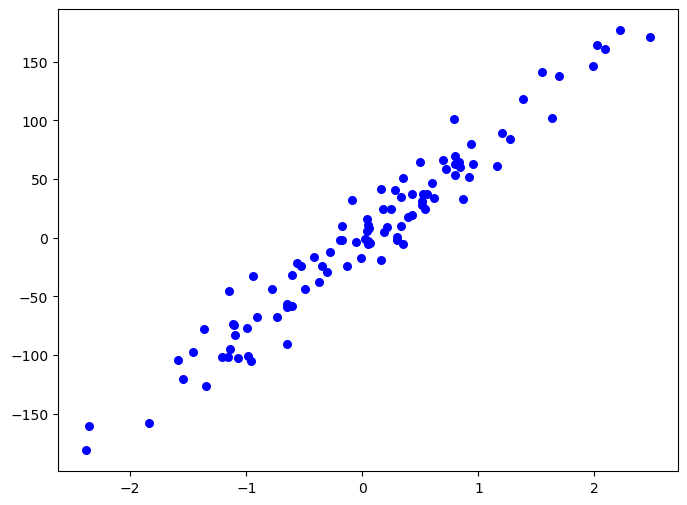

In [40]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color = "b", marker = "o", s = 30)
plt.show()

In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [42]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [43]:
mse = mse(y_test, predictions)
print(mse)

305.7719958301902


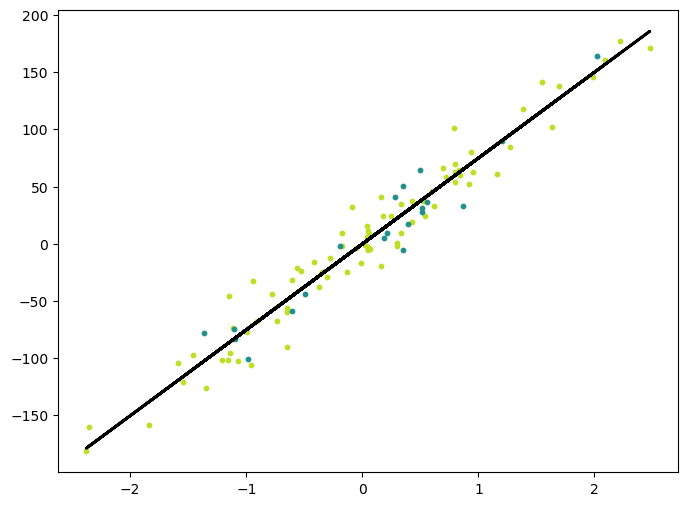

In [44]:
# GRAPH TO SHOW 

y_pred_line = reg.predict(X) 
cmap = plt.get_cmap('viridis') 
fig = plt.figure(figsize=(8,6)) 
m1 = plt.scatter (X_train, y_train, color=cmap(0.9), s = 10 ) 
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s = 10 ) 
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction') 
plt.show()

## ANIMATION STYLE

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import datasets
from sklearn.model_selection import train_test_split

class LinearRegressionAnimated:
    
    def __init__(self, lr=0.001, n_iters=100):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.past_weights = []
        self.past_biases = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Store weights and biases
            self.past_weights.append(self.weights.copy())
            self.past_biases.append(self.bias)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [48]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

reg = LinearRegressionAnimated(lr=0.01, n_iters=300)
reg.fit(X_train, y_train)


In [49]:
# Prepare figure
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
plt.title('Linear Regression Fit Over Time')
plt.xlabel('Feature')
plt.ylabel('Target')

# Training and testing scatter
cmap = plt.get_cmap('viridis')
ax.scatter(X_train, y_train, color=cmap(0.9), s=10, label='Train')
ax.scatter(X_test, y_test, color=cmap(0.5), s=10, label='Test')
line, = ax.plot([], [], color='black', linewidth=2, label='Prediction')
annotation = ax.text(X.min(), y.max(), '', fontsize=10)
annotation.set_animated(True)
ax.legend()

plt.close()  # prevent static display in some environments

# Initialization function
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# Animation function
def animate(i):
    w = reg.past_weights[i][0]
    b = reg.past_biases[i]
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = w * x_vals + b
    line.set_data(x_vals, y_vals)
    annotation.set_text(f'Iteration {i+1}')
    return line, annotation

# Create animation
ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(reg.past_weights), interval=50, blit=True)

# Save and display
ani.save('regression_training.gif', writer='pillow', fps=30)



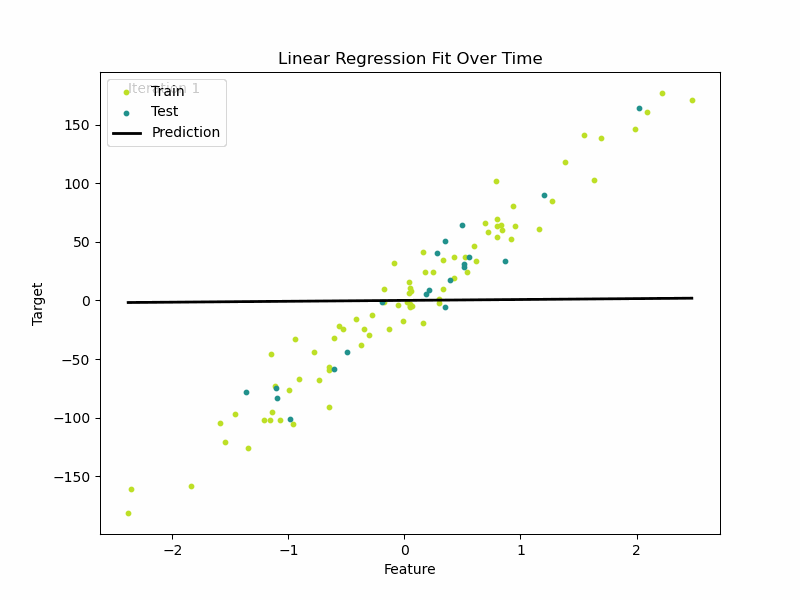

In [50]:
import io
import base64
from IPython.display import HTML

filename = 'regression_training.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data=f'''<img src="data:image/gif;base64,{encoded.decode('ascii')}" />''')
